In [21]:
#import data handling libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#read in the main dataset
df = pd.read_csv('../Data/dataset_engineered.csv')

df

,STUDENT,ENT_SEM,GRAD_SEM,101,104,105,140,143,150,160,...,SEM8.0_GEN_cdf,SEM8.5_GEN_cdf,SEM9.0_GEN_cdf,SEM9.5_GEN_cdf,slp,int,slp_math,int_math,slp_gen,int_gen
0,0,20.6,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1,-1,-1,-1,-1.368421e-01,5.444869e-17,0.0,0.0,-1.368421e-01,5.444869e-17
1,3,20.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,-2.363863e-17,1.000000e+00,0.0,0.0,-2.363863e-17,1.000000e+00
2,4,19.6,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,3,3,2.701754e-01,1.017544e+00,0.0,0.0,2.701754e-01,1.017544e+00
3,5,20.6,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
4,7,19.6,8.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1.543860e-01,-1.929825e-01,0.0,0.0,1.543860e-01,-1.929825e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,13059,20.6,4.5,0.0,0.0,0.0,3.5,0.0,1.0,0.0,...,2,2,2,2,1.684211e-01,7.894737e-01,0.0,0.0,1.684211e-01,7.894737e-01
9177,13060,14.6,12.0,0.0,0.0,0.0,-1.0,0.0,-2.5,0.0,...,-2,-2,-2,-2,-1.368421e-01,-1.052632e+00,0.0,0.0,-1.368421e-01,-1.052632e+00
9178,13061,16.6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1,1,1,1,8.421053e-02,4.210526e-01,0.0,0.0,8.421053e-02,4.210526e-01
9179,13062,13.6,6.0,0.0,0.0,0.0,0.0,0.0,-4.5,0.0,...,-1,-1,-1,-1,-1.543860e-01,1.929825e-01,0.0,0.0,-1.543860e-01,1.929825e-01


In [22]:
df.columns

Index(['STUDENT', 'ENT_SEM', 'GRAD_SEM', '101', '104', '105', '140', '143',
       '150', '160', '165', '166', '201', '207', '25', '265', '266', '267',
       '301', '304', '314', '317', '341', '385', '397', '414', '435', '436',
       '492', '495', '500', 'Y', 'SEM0.5_cdf', 'SEM1.0_cdf', 'SEM1.5_cdf',
       'SEM2.0_cdf', 'SEM2.5_cdf', 'SEM3.0_cdf', 'SEM3.5_cdf', 'SEM4.0_cdf',
       'SEM4.5_cdf', 'SEM5.0_cdf', 'SEM5.5_cdf', 'SEM6.0_cdf', 'SEM6.5_cdf',
       'SEM7.0_cdf', 'SEM7.5_cdf', 'SEM8.0_cdf', 'SEM8.5_cdf', 'SEM9.0_cdf',
       'SEM9.5_cdf', 'SEM0.5_GEN_cdf', 'SEM1.0_GEN_cdf', 'SEM1.5_GEN_cdf',
       'SEM2.0_GEN_cdf', 'SEM2.5_GEN_cdf', 'SEM3.0_GEN_cdf', 'SEM3.5_GEN_cdf',
       'SEM4.0_GEN_cdf', 'SEM4.5_GEN_cdf', 'SEM5.0_GEN_cdf', 'SEM5.5_GEN_cdf',
       'SEM6.0_GEN_cdf', 'SEM6.5_GEN_cdf', 'SEM7.0_GEN_cdf', 'SEM7.5_GEN_cdf',
       'SEM8.0_GEN_cdf', 'SEM8.5_GEN_cdf', 'SEM9.0_GEN_cdf', 'SEM9.5_GEN_cdf',
       'slp', 'int', 'slp_math', 'int_math', 'slp_gen', 'int_gen'],
      

In [23]:
courses = ['101', '104', '105', '140', '143',
       '150', '160', '165', '166', '201', '207', '25', '265', '266', '267',
       '301', '304', '314', '317', '341', '385', '397', '414', '435', '436',
       '492', '495', '500']
SEMs = ['ENT_SEM','SEM0.5_cdf', 'SEM1.0_cdf', 'SEM1.5_cdf',
       'SEM2.0_cdf', 'SEM2.5_cdf', 'SEM3.0_cdf', 'SEM3.5_cdf', 'SEM4.0_cdf',
       'SEM4.5_cdf', 'SEM5.0_cdf', 'SEM5.5_cdf', 'SEM6.0_cdf', 'SEM6.5_cdf',
       'SEM7.0_cdf', 'SEM7.5_cdf', 'SEM8.0_cdf', 'SEM8.5_cdf', 'SEM9.0_cdf',
       'SEM9.5_cdf', 'SEM0.5_GEN_cdf', 'SEM1.0_GEN_cdf', 'SEM1.5_GEN_cdf',
       'SEM2.0_GEN_cdf', 'SEM2.5_GEN_cdf', 'SEM3.0_GEN_cdf', 'SEM3.5_GEN_cdf',
       'SEM4.0_GEN_cdf', 'SEM4.5_GEN_cdf', 'SEM5.0_GEN_cdf', 'SEM5.5_GEN_cdf',
       'SEM6.0_GEN_cdf', 'SEM6.5_GEN_cdf', 'SEM7.0_GEN_cdf', 'SEM7.5_GEN_cdf',
       'SEM8.0_GEN_cdf', 'SEM8.5_GEN_cdf', 'SEM9.0_GEN_cdf', 'SEM9.5_GEN_cdf']
continuous = ['slp', 'int', 'slp_math', 'int_math', 'slp_gen', 'int_gen']

all_features = courses + SEMs + continuous
print('Number of features in the dataset:', len(all_features))
print('Overall grad rate:', df['Y'].mean())
random_states = [5917, 656, 4125, 2797, 9936]
print('Random states:', random_states)

Number of features in the dataset: 73
Overall grad rate: 0.4897070035943797
Random states: [5917, 656, 4125, 2797, 9936]


In [24]:
splits = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[all_features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits.append((X_train, X_test, y_train, y_test))

In [25]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.2],
    'n_estimators': [200],  # Changed from 'num_boost_round' to 'n_estimators'
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgb_models = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       random_state=random_states[i],
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models):
    y_pred = search.predict(splits[i][1])
    xgb_df.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df.loc[i, 'test_accuracy'] = accuracy_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_precision'] = precision_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_recall'] = recall_score(splits[i][3], y_pred)
    xgb_df.loc[i, 'test_f1'] = f1_score(splits[i][3], y_pred)
xgb_df

Best accuracy for split 0:  66.163%
Best accuracy for split 1:  66.422%
Best accuracy for split 2:  66.109%
Best accuracy for split 3:  66.735%
Best accuracy for split 4:  65.795%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.661631,0.672292,0.67654,0.634444,0.654817
1,0.664217,0.658138,0.659624,0.624444,0.641553
2,0.661086,0.659771,0.655017,0.645556,0.650252
3,0.66735,0.644529,0.643772,0.614444,0.628766
4,0.65795,0.675014,0.668521,0.667778,0.668149


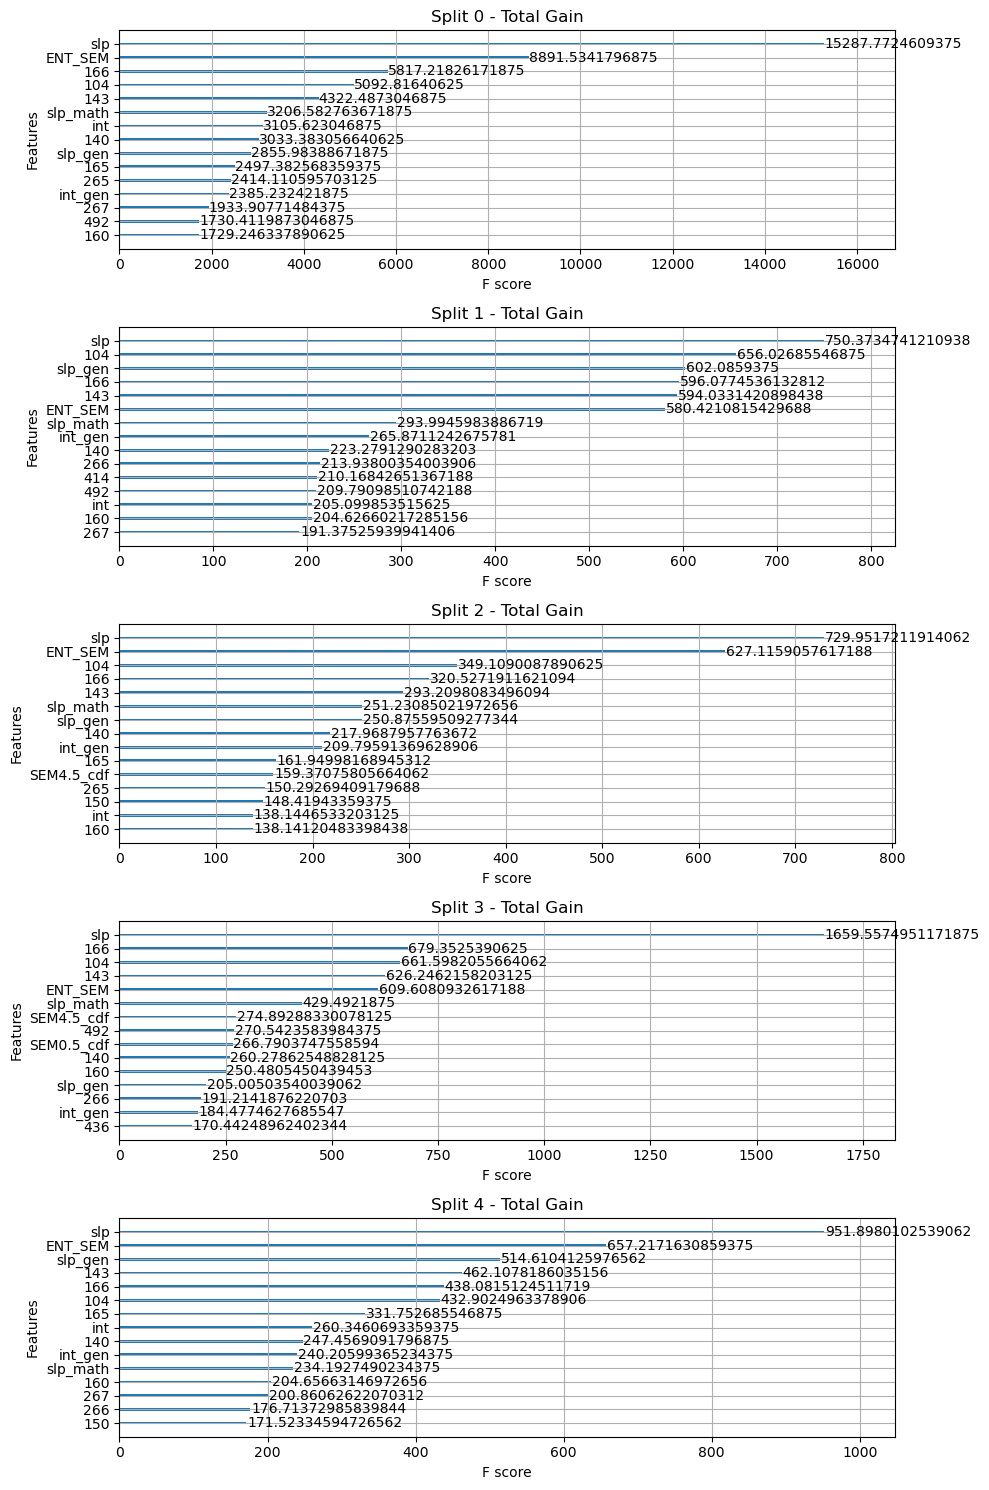

In [28]:
# Create a 5x2 grid of subplots
fig, ax = plt.subplots(5, 1, figsize=(10, 15))

for i, search in enumerate(xgb_models):
    # Plot gain on the left
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='total_gain', 
                        max_num_features=15,
                        title=f'Split {i} - Total Gain')
    ax[i].set_ylabel('Features')
    ax[i].set_xlabel('F score')

plt.tight_layout()
plt.show()


In [30]:
#make a list consisting of the union of the top 15 features from each split
top_features = []
for search in xgb_models:
    fimps = search.best_estimator_.get_booster().get_score(importance_type='total_gain')
    #add the top 15 features from fimps to top_features
    top_features.extend([k for k, v in sorted(fimps.items(), key=lambda item: item[1], reverse=True)][:20])

print('Number of unique top features:', len(set(top_features)))

Number of unique top features: 26


In [14]:
continuous_features = ['slp', 'int', 'slp_math', 'int_math', 'slp_gen', 'int_gen']
SEM_features = ['ENT_SEM', 'SEM1.0_cdf', 'SEM2.0_cdf', 'SEM4.5_cdf', 'SEM9.5_cdf']
features_reduced = courses + continuous_features + SEM_features
print('Number of reduced features in the dataset:', len(features_reduced))

Number of reduced features in the dataset: 39


In [31]:
features_reduced = list(set(top_features))
xgb_models_reduced = []
splits_reduced = []
for i in range(5):
    # Drop features not in reduced_features from train and test sets
    X_train_reduced = splits[i][0][features_reduced]
    X_test_reduced = splits[i][1][features_reduced]
    splits_reduced.append((X_train_reduced, X_test_reduced, splits[i][2], splits[i][3]))

for i, (X_train_reduced, X_test_reduced, y_train, y_test) in enumerate(splits_reduced):
    #retrain the model
    xgb_model_reduced = xgb.XGBClassifier()
    random_search_reduced = RandomizedSearchCV(estimator=xgb_model_reduced, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       random_state=random_states[i],
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search_reduced.fit(X_train_reduced, y_train)
    xgb_models_reduced.append(random_search_reduced)
    print(f"Best accuracy for split {i}:  {random_search_reduced.best_score_ * 100:0.3f}%")

xgb_df_reduced = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_reduced):
    y_pred = search.predict(splits_reduced[i][1])
    xgb_df_reduced.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_reduced.loc[i, 'test_accuracy'] = accuracy_score(splits_reduced[i][3], y_pred)
    xgb_df_reduced.loc[i, 'test_precision'] = precision_score(splits_reduced[i][3], y_pred)
    xgb_df_reduced.loc[i, 'test_recall'] = recall_score(splits_reduced[i][3], y_pred)
    xgb_df_reduced.loc[i, 'test_f1'] = f1_score(splits_reduced[i][3], y_pred)
xgb_df_reduced

Best accuracy for split 0:  66.013%
Best accuracy for split 1:  66.204%
Best accuracy for split 2:  65.972%
Best accuracy for split 3:  66.612%
Best accuracy for split 4:  65.918%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.660134,0.672836,0.668546,0.658889,0.663682
1,0.662039,0.652695,0.656699,0.61,0.632488
2,0.659724,0.664671,0.662471,0.643333,0.652762
3,0.666124,0.642352,0.641774,0.611111,0.626067
4,0.659176,0.676102,0.668508,0.672222,0.67036


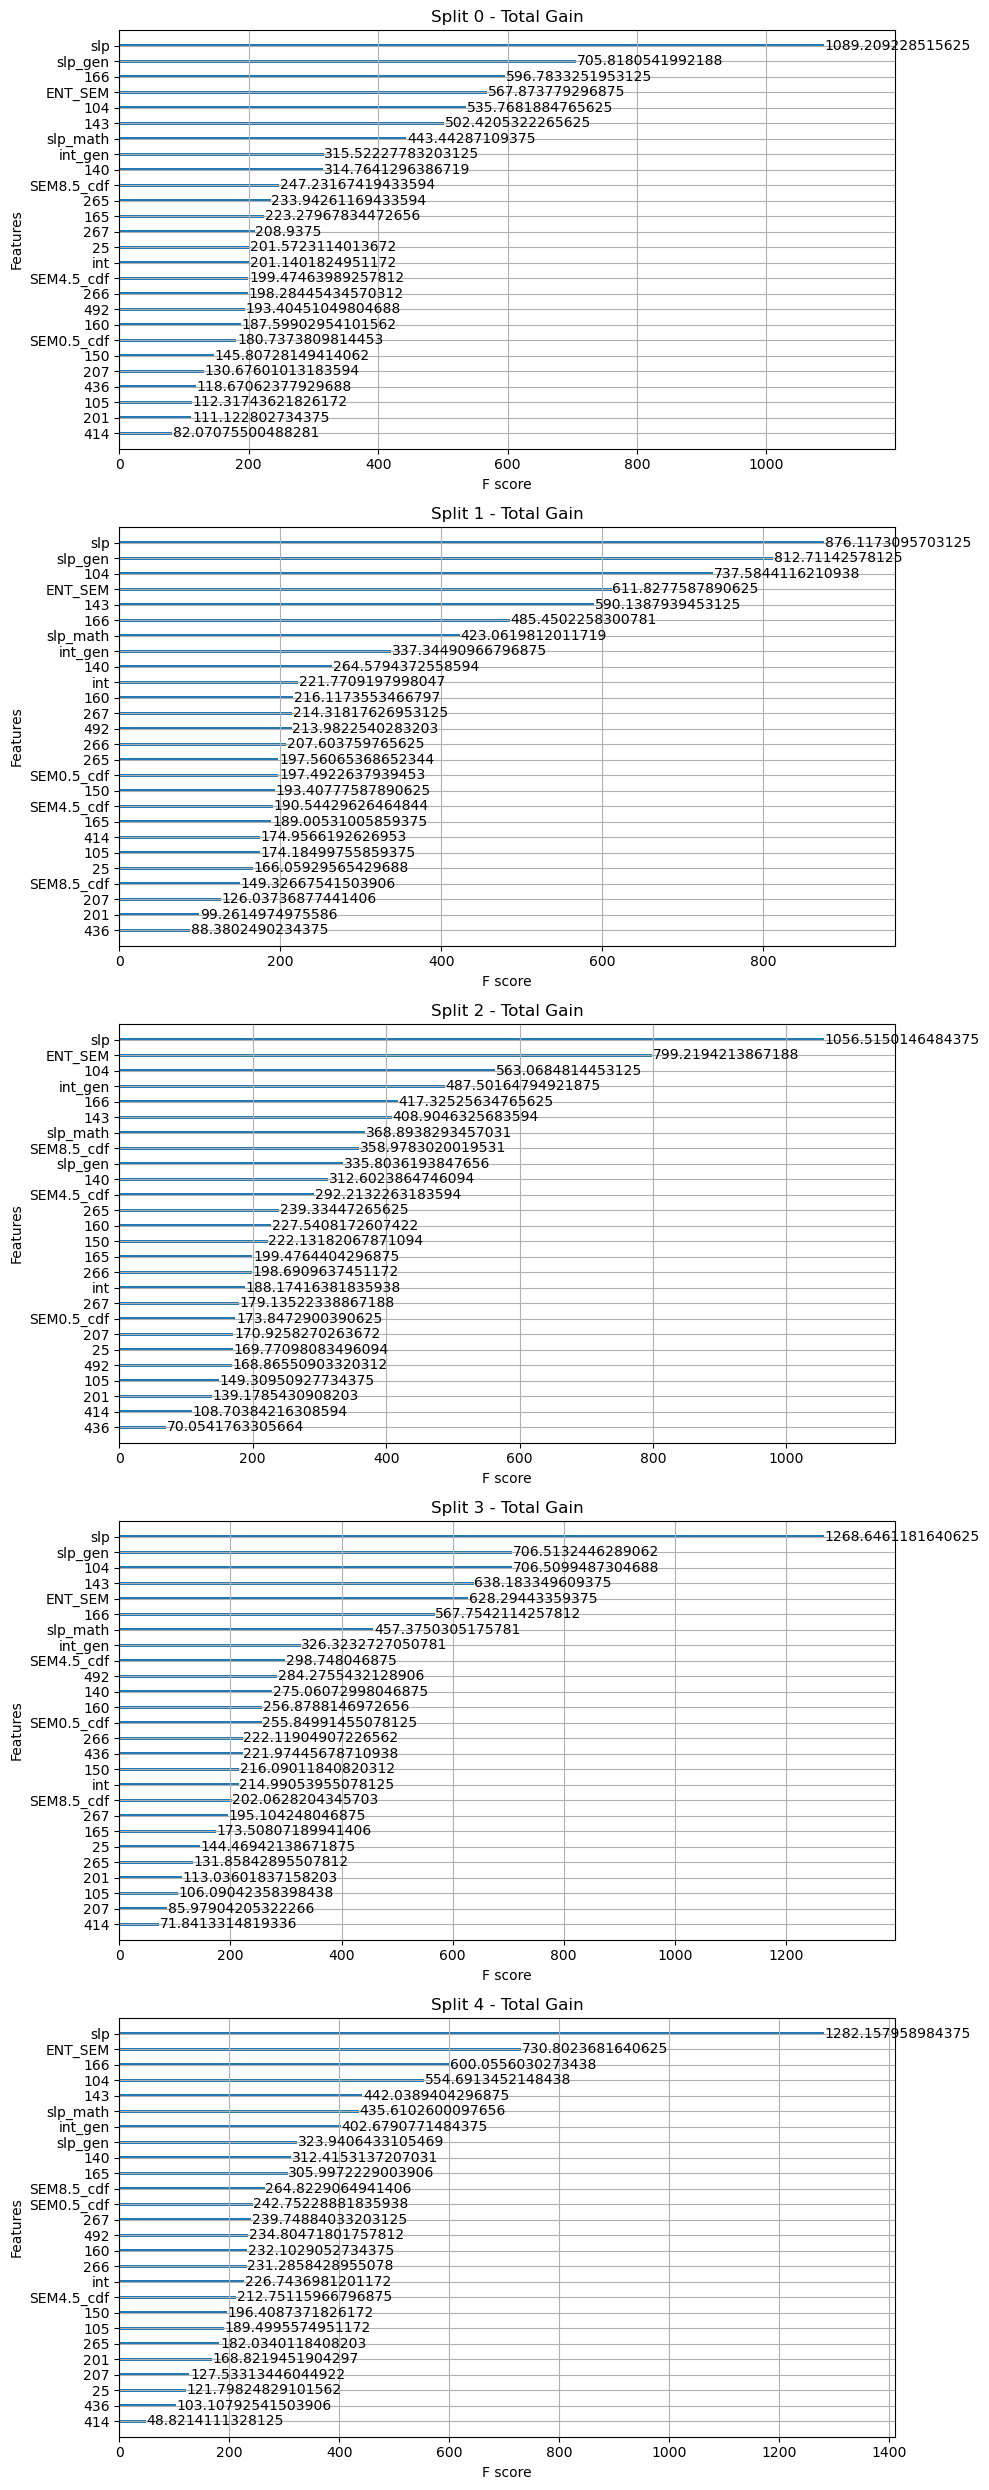

In [33]:
fig, ax = plt.subplots(5, 1, figsize=(10, 25))
for i, search in enumerate(xgb_models_reduced):
    # Plot total gain
    xgb.plot_importance(search.best_estimator_, 
                        ax=ax[i], 
                        importance_type='total_gain', 
                        title=f'Split {i} - Total Gain')
    ax[i].set_ylabel('Features')
    ax[i].set_xlabel('F score')

plt.tight_layout()
plt.show()

In [44]:
#replace all negative values in df[courses] with -1
df[courses] = df[courses].applymap(lambda x: -1 if x < 0 else x)

/var/folders/br/143tjw8148nftd61z3w9qzv40000gp/T/ipykernel_25098/1702116874.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[courses] = df[courses].applymap(lambda x: -1 if x < 0 else x)


In [45]:
splits_clipped = []
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(df[all_features], 
                                                        df['Y'], 
                                                        test_size=0.2, 
                                                        random_state=random_state,
                                                        shuffle=True,
                                                        stratify=df['Y'])
    splits_clipped.append((X_train, X_test, y_train, y_test))

In [46]:
xgb_models_clipped = []
for i, (X_train, X_test, y_train, y_test) in enumerate(splits_clipped):
    xgb_model = xgb.XGBClassifier()
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5,
                                       random_state=random_states[i],
                                       scoring='accuracy', 
                                       verbose=0, 
                                       n_jobs=-1)
    random_search.fit(X_train, y_train)
    xgb_models_clipped.append(random_search)
    print(f"Best accuracy for split {i}:  {random_search.best_score_ * 100:0.3f}%")

xgb_df_clipped = pd.DataFrame(columns=['cv_accuracy','test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
for i, search in enumerate(xgb_models_clipped):
    y_pred = search.predict(splits_clipped[i][1])
    xgb_df_clipped.loc[i, 'cv_accuracy'] = search.best_score_
    xgb_df_clipped.loc[i, 'test_accuracy'] = accuracy_score(splits_clipped[i][3], y_pred)
    xgb_df_clipped.loc[i, 'test_precision'] = precision_score(splits_clipped[i][3], y_pred)
    xgb_df_clipped.loc[i, 'test_recall'] = recall_score(splits_clipped[i][3], y_pred)
    xgb_df_clipped.loc[i, 'test_f1'] = f1_score(splits_clipped[i][3], y_pred)
xgb_df_clipped

Best accuracy for split 0:  65.986%
Best accuracy for split 1:  66.122%
Best accuracy for split 2:  66.149%
Best accuracy for split 3:  66.599%
Best accuracy for split 4:  65.754%


,cv_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,0.65986,0.669026,0.670561,0.637778,0.653759
1,0.661222,0.659227,0.664663,0.614444,0.638568
2,0.661493,0.671747,0.665922,0.662222,0.664067
3,0.665989,0.643985,0.647129,0.601111,0.623272
4,0.657541,0.666848,0.662528,0.652222,0.657335


In [47]:
grouped = df.groupby(courses)
df_grouped = pd.DataFrame({
    'Pr(X)' : grouped.size() / len(df),
    'Pr(Y|X)': grouped['Y'].mean()}).reset_index()

#add a column named "ERROR(Y|X)" which contains the minimum of Pr(Y|X) and 1-Pr(Y|X)
df_grouped['ERROR(Y|X)'] = np.minimum(df_grouped['Pr(Y|X)'], 1-df_grouped['Pr(Y|X)'])

#compute the bayes error rate. This is the expected value of ERROR(Y|X) over the distribution of X
bayes_error_rate = np.dot(df_grouped['ERROR(Y|X)'], df_grouped['Pr(X)'])

print(f'Maximum achievable accuracy: {(1-bayes_error_rate)*100:.3f}%')

Maximum achievable accuracy: 73.739%


In [42]:
df_grouped[df_grouped['Pr(X)'] > df_grouped['Pr(X)'].values.min()]

,101,104,105,140,143,150,160,165,166,201,...,397,414,435,436,492,495,500,Pr(X),Pr(Y|X),ERROR(Y|X)
1,0.0,-9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,1.000000,0.000000
3,0.0,-8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000762,0.285714,0.285714
6,0.0,-7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000436,0.500000,0.500000
9,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001198,0.363636,0.363636
14,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001307,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000327,0.000000,0.000000
2476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000654,0.000000,0.000000
2478,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000218,0.500000,0.500000
2482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000218,1.000000,0.000000


In [37]:
df_grouped[df_grouped['ERROR(Y|X)'] > 0].sort_values(by='Pr(X)', ascending=False)

,101,104,105,140,143,150,160,165,166,201,...,397,414,435,436,492,495,500,Pr(X),Pr(Y|X),ERROR(Y|X)
1661,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037469,0.412791,0.412791
1146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035290,0.472222,0.472222
1570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023309,0.602804,0.397196
1899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020586,0.412698,0.412698
1582,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019279,0.604520,0.395480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.000218,0.500000,0.500000
1774,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000218,0.500000,0.500000
1740,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000218,0.500000,0.500000
378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.5,0.0,0.0,0.000218,0.500000,0.500000


In [38]:
grouped = df.groupby(all_features)
df_grouped = pd.DataFrame({
    'Pr(X)' : grouped.size() / len(df),
    'Pr(Y|X)': grouped['Y'].mean()}).reset_index()

#add a column named "ERROR(Y|X)" which contains the minimum of Pr(Y|X) and 1-Pr(Y|X)
df_grouped['ERROR(Y|X)'] = np.minimum(df_grouped['Pr(Y|X)'], 1-df_grouped['Pr(Y|X)'])

#compute the bayes error rate. This is the expected value of ERROR(Y|X) over the distribution of X
bayes_error_rate = np.dot(df_grouped['ERROR(Y|X)'], df_grouped['Pr(X)'])

print(f'Maximum achievable accuracy: {(1-bayes_error_rate)*100:.3f}%')

Maximum achievable accuracy: 81.255%


In [39]:
df_grouped[df_grouped['ERROR(Y|X)'] > 0].sort_values(by='Pr(X)', ascending=False)

,101,104,105,140,143,150,160,165,166,201,...,SEM9.5_GEN_cdf,slp,int,slp_math,int_math,slp_gen,int_gen,Pr(X),Pr(Y|X),ERROR(Y|X)
2804,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.006100,0.285714,0.285714
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.006100,0.446429,0.446429
2806,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.006100,0.517857,0.482143
2813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.005882,0.388889,0.388889
2802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.005337,0.367347,0.367347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,1,0.136842,-0.368421,0.0,0.0,0.136842,-0.368421,0.000218,0.500000,0.500000
1124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.084211,0.421053,0.0,0.0,0.084211,0.421053,0.000218,0.500000,0.500000
1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.031579,0.789474,0.0,0.0,0.031579,0.789474,0.000218,0.500000,0.500000
3006,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,2,0.115789,1.210526,0.0,0.0,0.115789,1.210526,0.000218,0.500000,0.500000
